In [23]:

# import libraries
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


Read Data

In [24]:

# load the data
pd.set_option('display.max_columns', None) 

In [58]:
# load the data


df_final_demo = pd.read_csv('../Data/Cleaned/df_final_demo (1).txt')
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [59]:
# check for missing values
df_final_demo[df_final_demo.isnull().any(axis=1)]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_final_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB


In [61]:
# remove the missing values
df_final_demo = df_final_demo.dropna()

In [62]:
df_final_demo['gendr'].value_counts()

gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

In [67]:
# remove gendr value X
df_final_demo = df_final_demo[df_final_demo['gendr'] != 'X']
df_final_demo['gendr'].value_counts()

gendr
U    24122
M    23724
F    22745
Name: count, dtype: int64

In [72]:
# sign gendr U M F to a integer value
df_final_demo['gendr'] = df_final_demo['gendr'].map({'U':0, 'M':1, 'F':2})

# change it back to U M F 
df_final_demo['gendr'] = df_final_demo['gendr'].map({0:'U', 1:'M', 2:'F'})



In [73]:
df_final_demo.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [74]:
df_final_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.059100e+04,70591.000000,70591.000000,70591.000000,70591.000000,7.059100e+04,70591.000000,70591.000000
mean,5.005066e+06,12.053109,150.661317,46.442542,2.255528,1.474518e+05,3.382457,5.566701
std,2.877324e+06,6.871976,82.091724,15.591381,0.535002,3.015160e+05,2.236601,2.353302
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519604e+06,6.000000,82.000000,32.500000,2.000000,3.734846e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333689e+04,3.000000,5.000000
75%,7.483160e+06,16.000000,192.000000,59.000000,2.000000,1.375501e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [84]:
df_final_demo.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           70591
bal                 70329
clnt_tenure_mnth      482
clnt_age              165
clnt_tenure_yr         54
logons_6_mnth           9
num_accts               8
calls_6_mnth            8
dtype: int64

Only category is Gender

In [75]:
list(set(df_final_demo.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [56]:
df_final_experiment = pd.read_csv('../Data/Cleaned/df_final_experiment_clients.txt')
df_final_experiment['Variation'].value_counts()

Variation
Test       26968
Control    23532
Name: count, dtype: int64

In [80]:
df_final_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


Merge dataset df_final_experiment and df_final_demo


In [55]:
# check for missing values
df_final_experiment[df_final_experiment.isnull().any(axis=1)]

,client_id,Variation
50500,5459747,NaN
50501,8031000,NaN
50502,1847030,NaN
50503,9713157,NaN
50504,7775828,NaN
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


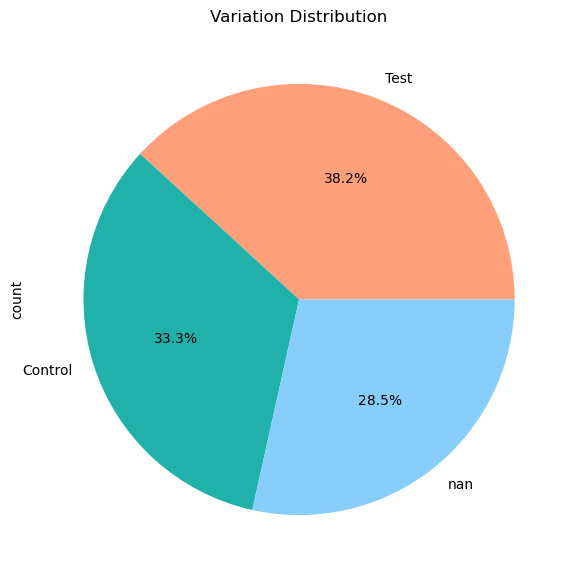

In [89]:
# pie chart to show the distribution of the variation
plt.figure(figsize=(10, 7))
df_final_experiment['Variation'].value_counts(dropna=False).plot.pie(autopct='%1.1f%%',colors=['#FFA07A', '#20B2AA', '#87CEFA'])
plt.title('Variation Distribution')
plt.show()



In [ ]:
my_table = pd.crosstab(index = df_categorical["MSZoning"],  # Make a crosstab
                              columns="count")      # Name the count column
my_table

### Merge datasets for df_web_data

In [15]:
df_web_data1 = pd.read_csv('../Data/Cleaned/df_final_web_data_pt_1.txt')
df_web_data1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [16]:
df_web_data2 = pd.read_csv('../Data/Cleaned/df_final_web_data_pt_2.txt')
df_web_data2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [38]:
# merge the data
df_web_data = pd.concat([df_web_data1, df_web_data2])
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [91]:
# grouo by client id and sum the values
df_web_data1 = df_web_data.groupby('client_id').sum().reset_index()
df_web_data1

,client_id,visitor_id,visit_id,process_step,date_time
0,169,201385055_71273495308201385055_712734953082013...,749567106_99161211863_557568749567106_99161211...,confirmstep_3step_2step_1start,2017-04-12 20:23:092017-04-12 20:22:052017-04-...
1,336,64757908_340012825664757908_3400128256,649044751_80905125055_554468649044751_80905125...,startstart,2017-06-01 07:42:432017-06-01 07:26:55
2,546,475037402_89828530214475037402_898285302144750...,731811517_9330176838_94847731811517_9330176838...,confirmstep_3step_2step_1start,2017-06-17 10:05:422017-06-17 10:05:192017-06-...
3,555,402506806_56087378777402506806_560873787774025...,637149525_38041617439_716659637149525_38041617...,confirmstep_3step_2step_1start,2017-04-15 13:00:342017-04-15 13:00:142017-04-...
4,647,66758770_5398806658766758770_53988066587667587...,40369564_40101682850_31184740369564_4010168285...,confirmstep_3step_2step_1start,2017-04-12 15:47:452017-04-12 15:45:022017-04-...
...,...,...,...,...,...
120152,9999729,604429154_69247391147604429154_692473911478433...,99583652_41711450505_42617999583652_4171145050...,step_1startstartstep_2step_1startconfirmstep_3...,2017-04-05 13:41:042017-04-05 13:40:492017-04-...
120153,9999768,389637884_26725643037389637884_267256430373896...,85676722_11636430786_12270485676722_1163643078...,confirmstep_3step_2step_1startstartstep_1step_...,2017-06-03 18:13:162017-06-03 18:12:432017-06-...
120154,9999832,145538019_54444341400145538019_54444341400,472154369_16714624241_585315472154369_16714624...,step_1start,2017-05-16 16:46:112017-05-16 16:46:03
120155,9999839,948322592_28990736246948322592_289907362469483...,715530422_68620416793_515645715530422_68620416...,confirmstep_3step_2step_1startstart,2017-03-29 12:13:032017-03-29 12:12:282017-03-...


In [97]:
# checking one client id
df_web_data[df_web_data['client_id'] == 9988021]

# organzie the data by date_time
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'])

df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
286566,9088444,242404224_96732670250,423038079_46067236368_400417,step_3,2017-03-15 00:03:03
35293,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28
35292,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50
35291,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52
35290,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47
...,...,...,...,...,...
176132,4159912,169591677_18042085072,358114812_31313949217_790854,start,2017-06-20 23:58:40
176131,4159912,169591677_18042085072,358114812_31313949217_790854,step_1,2017-06-20 23:59:00
176130,4159912,169591677_18042085072,358114812_31313949217_790854,step_2,2017-06-20 23:59:23
184010,5640210,854970757_75895258102,959123368_90077952691_695747,start,2017-06-20 23:59:53


In [98]:
# checking one client id
df_web_data[df_web_data['client_id'] == 9988021]

# checking this id and sort it by date_time 
df_web_data[df_web_data['client_id'] == 9988021].sort_values('date_time')

,client_id,visitor_id,visit_id,process_step,date_time
162,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 16:57:27
161,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 17:34:37
133,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 17:50:38
132,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:06:39
131,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:22:40
130,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:38:42
129,9988021,580560515_7732621733,219729223_42518459208_211914,start,2017-04-12 18:54:43
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15


In [ ]:
# check process_ step date difference in seconds
df_web_data['date_time'] = pd.to_datetime(df_web_data['date_time'])
df_web_data = df_web_data.sort_values(['client_id', 'date_time'])
df_web_data['date_diff'] = df_web_data.groupby('client_id')['date_time'].diff().dt.total_seconds()


In [99]:
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
286566,9088444,242404224_96732670250,423038079_46067236368_400417,step_3,2017-03-15 00:03:03
35293,7179755,167765295_97487764427,264484508_5982901710_928530,start,2017-03-15 00:19:28
35292,7179755,167765295_97487764427,264484508_5982901710_928530,step_1,2017-03-15 00:20:50
35291,7179755,167765295_97487764427,264484508_5982901710_928530,step_2,2017-03-15 00:22:52
35290,7179755,167765295_97487764427,264484508_5982901710_928530,step_3,2017-03-15 00:23:47
...,...,...,...,...,...
176132,4159912,169591677_18042085072,358114812_31313949217_790854,start,2017-06-20 23:58:40
176131,4159912,169591677_18042085072,358114812_31313949217_790854,step_1,2017-06-20 23:59:00
176130,4159912,169591677_18042085072,358114812_31313949217_790854,step_2,2017-06-20 23:59:23
184010,5640210,854970757_75895258102,959123368_90077952691_695747,start,2017-06-20 23:59:53


In [101]:
# sort the data by client id and date_time
df_web_data = df_web_data.sort_values(['client_id', 'date_time'])
df_web_data 

,client_id,visitor_id,visit_id,process_step,date_time
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
...,...,...,...,...,...
305392,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
305391,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28
305390,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47
305389,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58


In [ ]:
#